<center> 
    
# ⚔构建你的第一个AI项目
    
<br>
<br>

</center>

<div class="alert alert-block alert-success">  
 <b>Version:</b> v2.1  <b>Draft Date:</b> 2020-06-09   
<br>
 - <b>Release Version 1.0:</b> 2020-07-25
 <br>
 - <b>Release Version 1.1:</b> 2020-08-15 
<br>
 - <b>V2.0(Update to OneDay TrainNote)</b> 2020-12-08
 <br>
 - <b>V1.20 (Half Day Updated)</b>
   
<br> 
<br>
    
为了更好的掌握人工智能项目构建的流程和实现过程中的细节，在本课程中，我们将通过动手实验的形式着手构建一个端到端的人工智能项目，回顾前述课程学习的内容，通过动手实践来强化对相关概念和知识的认识及了解。 
    
希望对你巩固所学知识会有所帮助。
</div>


<div class="alert alert-block alert-info">
<b>💡:</b> 

- 预计时间： ~3-6小时；
- 技能要求：基本的编程知识(python is preferred)；  
- 前期准备：人工智能实训平台账号 + 可以连接网络的浏览器(Chrome is preferred);
- Binder: [Click Here](https://mybinder.org/v2/gh/ddebby/First_AI_Project/master?filepath=01.lab_your_first_ai_project.ipynb)
</div>

### 本文档中相关注释说明

<div class="alert alert-block alert-info">
<b>提示💡:</b> 

蓝色给大家一些新的提示要点，可以进行拓展操作.
    
<br>
<b>经验分享👣</b>

分享一些经验，踩过的坑. 
</div>

<div class="alert alert-block alert-warning">  
<b>知识回顾📕:</b> 

这部分会对学过的知识进行关联和回顾，便于大家进行巩固.  
</div>

<div class="alert alert-block alert-success">  
概要✅：

绿色部分为章节内容核心点，提醒关注.
</div>

<div class="alert alert-block alert-danger">  
<b>重要📌</b>
    
红色标识了重点注意事项，提醒大家注意.   
</div>

<details><summary>🤔--这是被隐藏的内容，思考之后再打开👇</summary>
<center>
>
>
打开之后你将看到内容的详情 ...
>
>
</center>
</details>

### 实验工具的简答说明

#### Jupyter Notebook

<div class="alert alert-block alert-success">  

✅这是用来做什么的？ ✅我该如何使用它？
    
✅基本操作：

- 文档（Markdown Cell） + 代码（Code Cell）
- 如何增加、删除cell(快捷键： `a, b, dd`)
- 如何执行代码（快捷键：`Shift + Enter`）
- 如何自动补全(`Tab`)
- 如何查看函数详情(`Shift Tab`)
- 如何保存与导出、上传与下载
    
✅不限于python：
- Notebooks 的魔术并不止于此。你甚至可以在 Notebooks 中使用其他语言，如 R, Julia, JavaScript等。
</div>

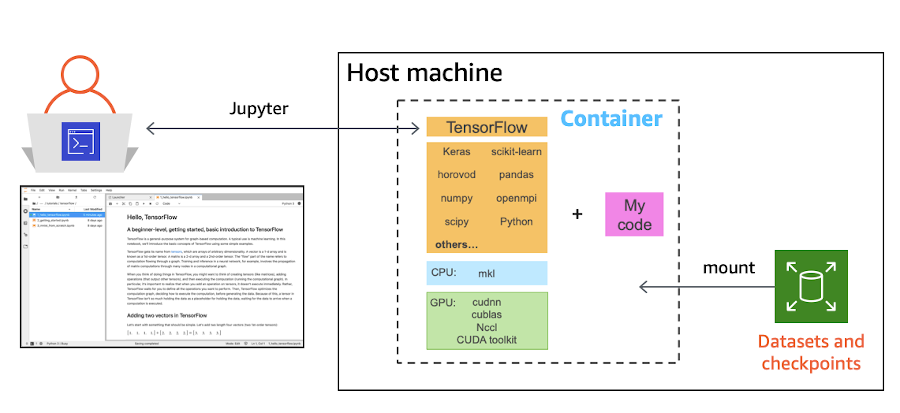

In [ ]:
1+1

In [ ]:
for i in range(5):
    print(i)

这是一段可编辑的文字

In [ ]:
%ls

In [ ]:
%lsmagic

#### 深度学习计算框架

<center>
<img src="imgs/tf_pytorch.png" width="500"/>
</center>

<div class="alert alert-block alert-success">  
✅：导入本次实验所需要的依赖包.
</div>

In [21]:
from utils import *

## Step 01. 项目背景

<div class="alert alert-block alert-success">  
<b>概要</b>✅：

> 假设你所在公司受一个动物保护协会委托，要为他们开发一款软件，用来通过部署在自然保护区的监控摄像头捕获照片，并利用人工智能算法自动识别图像中的动物类型。通过构建这样一套监控系统，有助于他们快速统计相关珍惜动物的生活习性及繁殖情况，有利于提前对濒临灭绝的珍稀物种进行必要的援助。
</div>

<table>
<td> 
<img src="imgs/181.gif" style="width:200;height:150px"> <br>
</td> 
<td> 
<img src="imgs/218.gif" style="width:200;height:150px"> <br>
</td> 
<td> 
<img src="imgs/246.gif" style="width:200;height:150px"> <br>
</td>
<td> 
<img src="imgs/340.gif" style="width:200;height:150px"> <br>
</td> 
</table>
<caption><center> 图1.自然保护区的监控视频片段</center></caption>

<div class="alert alert-block alert-danger">  
<b>重要📌</b>
    
分析用户需求尽量考虑全面、思考周详，开展工作尽量缩小范围，聚焦核心.   
</div>

<div class="alert alert-block alert-success">  
✅：
    
- 为了评估这件事情的可行性，我们通过一个课程实验重点关注这套系统中人工智能识别部分的可行性。在MVP阶段，为了降低问题的复杂性，我们将选取几种容易获取的物种照片，通过检索引擎快速搜索图片，构建原型模型。
    
- 在本实验中，为了能够在1天内完成这个项目，我们理想化的处理可行性分析阶段的数据，缩小范围为识别几种常见的动物的品种。
    
</div>

<div class="alert alert-block alert-info">
    
<b>经验分享👣</b>

1. 开始动手训练模型之前，我的团队一般会通过搜索开源项目或者相关领域论文，来快速寻找可以切入的BaseLine方案，BaseLine的选择决定了你开始解决问题的起点，是在山底徘徊还是从半山腰起步？
    
2. 很多时候，我们没办法及时从客户手中获得足够多的数据，但如果客户场景数据容易通过公共渠道快速获取，为了快速对用户的问题进行分析，我们可以利用相关工具获取部分数据(比如比赛数据、用户分享数据、检索引擎数据)。
</div>

### 人工智能项目构建流程回顾

<details><summary>🤔--还记得人工智能项目构建流程么？👇</summary>
<center>
<img src="imgs/arch.jpg" height="300" width="90%">
</center>
</details>

<details><summary>🤔--产品经理vs工程师视角--</summary>
<center>
<img src="imgs/workflow.png" height="200" width="60%">
</center>
</details>

## Step 02. 问题定义与描述

<details><summary>🤔--请先自己思考一下，分组讨论！👇</summary>
<div class="alert alert-block alert-danger">  
<b>一种参考答案📌</b>

- 问题： 自然场景下的图像分类问题；
- 输入：一张带🐕/🐱/🐘图像；
- 输出：图像中🐕/🐱/🐘的类型；

</div>
</details>

<center>
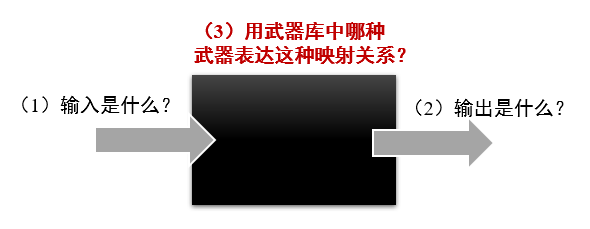
</center>

<div class="alert alert-block alert-info">
<b>思考如下内容🤔：</b> 

- 1. 为了简化问题，我们尝试忽略了图像中没有动物、同时有多只动物等复杂的场景，试想一下如果遇到这种复杂问题我们该如何解决？
    
- 2. 视频流中捕获还是拍照取像？什么时间拍摄？如何采样？

- 3. 有没有什么机制可以确保成功率，而不是全部让人工智能模型背锅（人工智能解决的核心问题是什么）？
    
- 4. 在原型设计阶段，你准备识别些什么（不一定局限到动物，但你需要熟悉并能很好的划分开）？
<details><summary>🤔----想不到该使用啥作为你本次实验室的入门素材，点开看看给你的推荐----👇</summary>
    <center>

    1. 比如做个狗熊分类的模型：[灰熊、黑熊、泰迪熊]

    2. 又比如[狮子、老虎、豹子]

    3. 或者干脆分类一下🐕和🐱

    4. 麋鹿、羚羊、山羊、牛？

    5. 你如果你对大象比较了解，选几种大象的种类？

    6. 你对鸟类感兴趣，选择几种候鸟？

    7. 你也可以不分类动物，分类下水果？ 蔬菜？ 常用的办公工具？

    </center>
</details>
    
</div>

## Step 03. 数据准备

<div class="alert alert-block alert-warning">  
<b>知识回顾📕:</b> 

还记得数据准备阶段的做菜几步法么？
</div>

<center>
<img src="imgs/data_preparing.png" height="200" width="60%">
</center>

<div class="alert alert-block alert-success">  
<b>概要</b>✅：

在本次实验中**我**选择了三种🐕的品种，进行数据采集，分别是：京巴、 泰迪、柯基犬；

🤔： 为什么选这三种？
    
你可以根据自己的喜好，选择三到四种常见动物来尝试构建个模型。

</div>

### 00.试吃--尝尝数据的味道

<div class="alert alert-block alert-success">  
<b>概要✅</b>：

🤔： 先通过[🔍搜索引擎](https://cn.bing.com/images)了解下数据的味道 ...
    
</div>

### 01.如何利用搜索引擎，快速获取数据

<div class="alert alert-block alert-success">  
概要✅：

如何快速获取数据进行可行性评估是胜败的关键，我们在本部分一些实践一些可以快速获取数据的方法
</div>

<div class="alert alert-block alert-success">  
✅：导入本次实验所需要的依赖包.
</div>

In [1]:
from utils import *

---
**下载一张图像测试一下**

In [2]:
results = search_images_bing("AI",total_count=5)

In [3]:
results

(#10) ['https://images.idgesg.net/images/article/2018/08/1_intro_top-ai-startups-100770370-large.jpg','https://bdtechtalks.com/wp-content/uploads/2019/01/AI-artificial-intelligence-brain-deep-learning.jpg','https://www.forbesindia.com/fbimages/900x600/proportional/jpeg/blog/wp-content/uploads/2018/07/BG-AI.jpg','http://www.differencebetween.net/wp-content/uploads/2019/12/Difference-Between-AI-and-CI.jpg','https://images.idgesg.net/images/article/2018/01/artificial_intelligence_ai_blockchain_digital_learning_chip-100745932-large.jpg','http://www.esa.int/var/esa/storage/images/esa_multimedia/images/2019/03/ai_and_earth_observation/19288930-1-eng-GB/AI_and_Earth_observation_pillars.jpg','https://cdn.ttgtmedia.com/visuals/searchEnterpriseAI/ai-platforms/searchEnterpriseAI_020_searchsitetablet_520X173.png','https://www.itworldcanada.com/ai/wp-content/uploads/2017/04/ai-bg.png','https://www.nikoyo.com/wp-content/uploads/2017/10/IoT-AI.jpg','https://rireme33.com/wp-content/uploads/AI2.jpg']

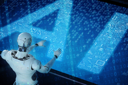

In [5]:
download_url(results[1], "demo.jpg")
im = Image.open("demo.jpg")
im.to_thumb(128,128)

#### 获得你所需要的训练数据集

> 此处选择三种我可以辨认的`狗狗`，便于测试，你们可以根据喜好选择自己的。

<div class="alert alert-block alert-info">
<b>请按照要求配置如下信息💡:</b> 

    
- 下面的 `dogs` 可以换成你需要的文件夹;
    
- `'京巴犬','泰迪犬','柯基犬'`中替换为你感兴趣的三种或多种动物类别;
    
- `max_n`用于控制每个类别最多获得多少图像，先使用默认值，后面可以进行调整。
    
</div>

In [2]:
imgs_dir = "dogs"
download_datasets(labels=['京巴犬','泰迪犬','柯基犬'], 
                  imgs_dir= imgs_dir, 
                  max_n=150)

<div class="alert alert-block alert-danger">  
<b>提问🤔</b>
    
这个过程中数据标记是如何体现的？   
</div>

In [ ]:
path.ls()

In [ ]:
images = get_image_files(path)
images

#### *其它快速获得数据的方法举例（可选）

<div class="alert alert-block alert-info">
    
<b>经验分享:如何不通过使用API key快速获取所需要的图像？👣</b>
1. 打开搜索引擎页面：[🔗链接](https://cn.bing.com/images/trending?FORM=ILPTRD)
2. 在搜索框输入要检索的关键词
3. （Chrome）在浏览器界面点击鼠标右键，选择 `检查`， 或直接使用快捷键**F12**,打开控制台；
4. 在 `Console`中粘贴如下代码：

    ```javascript
     urls=Array.from(document.querySelectorAll("a.iusc")).reduce((acc, el) => el.hasAttribute("m") ? acc.concat(JSON.parse(el.getAttribute("m")).murl) : acc, [])
     window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n'))); 
    ```
5. 弹出对话框中，重命名文件为`<类别名称>.csv`;
6. 对于每个类别通过上述2-5步骤进行操作，获得多个csv文件，并将csv文件上传至jupyter notebook server;
7. 使用如下命令，下载并获取所有的图像：
    
    ```python
    if not path.exists():
        path.mkdir()

    for o in data_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        download_images(dest, url_file=Path(f'{o}.csv'))   

    ```
</div>

<div class="alert alert-block alert-info">
    
<b>经验分享: 从google image获得图像的方法👣</b>
  
   详见：https://github.com/ddebby/AI-Lab/blob/master/99.tools/Chrome_Image_scraper.ipynb

</div>

### 02.数据治理

#### 数据清理

In [ ]:
a  = L([o.suffix for o in images])
a.unique()

下载下来的图片，格式（jpeg、png、gift等）、大小都不一致，需要进行一波清理，通过一个verify_images的工具，可以对图像进行基本的检查。

In [ ]:
failed = verify_images(images)
failed

我们可以通过一个`unlink`方法把失败的图像从图像的地址空间中清除

In [ ]:
failed.map(Path.unlink)

<div class="alert alert-block alert-danger">  
<b>重要🤔</b>
    
一般我们还需要快速查看一下数据的质量，清理掉标记错误的数据，不过有时候这个数据处理过程也可以后置，因为没有什么比快速构建模型优先级更高了:
    `(构建原型所需时间<<清理数据的时间)  ` 
</div>

#### 数据构建

<div class="alert alert-block alert-warning">  
<b>知识回顾📕:</b> 

开始构建数据集，一个人工智能数据集中一般要明确如下几个关键内容：
1. 你的输入数据是什么？ 输出数据是什么？
2. 你的数据存在哪里？ 模型该如何获取你的数据？
3. 数据集如何切分训练集和验证集？
4. 标记数据集：该如何获取数据的标签？
5. 该如何对数据进行预处理（满足模型要求）？
</div>

<div class="alert alert-block alert-danger">  
<b>重要📌</b>
    
在人工智能的数据处理中，经常讲一个概念叫做 `pipeline` ,描述的是一个数据流处理的管道，原始数据输入，整理好的可以直接使用的数据输入到模型。 `pipeline`本身就是个数据处理模式，可以套用到任何类似的场景和应用。
    
比如下面我们构建的这个就适用于绝大多数图像分类的问题。
</div>

In [ ]:
pipeline = DataBlock(
        blocks=(ImageBlock, CategoryBlock), #1.输入 与 输出
        get_items=get_image_files, # 2.数据哪里来
        splitter=RandomSplitter(valid_pct=0.2, seed=42), # 3.如何切分数据集
        get_y=parent_label, # 4.如何标记数据
        item_tfms=Resize(128)) # 5.如何进行数据预处理

> 数据集切分：20%测试数据，80%训练数据

![替代文字](imgs/Data_split.png)

In [ ]:
data = pipeline.dataloaders(path)

In [ ]:
len(data.train_ds),len(data.valid_ds)

In [ ]:
data.show_batch()

#### 数据增强

<div class="alert alert-block alert-success">  
✅：

图像增强技术是在小样本下可以保证模型学习效果的有效途径，也是防止过拟合的一种手段，常用的图像增强方法包括：平移、缩放、旋转、随机扣取 ...
</div>

![](imgs/augmentation.png)

In [ ]:
pipeline = pipeline.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = pipeline.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

#### 其它图像增强方法

**随机遮挡**

In [ ]:
tfm = RandomErasing(p=1., max_count=6)
nrm = Normalize.from_stats(*imagenet_stats, cuda=False)
timg = TensorImage(array(im)).permute(2,0,1).float()/255.
_,axs = subplots(2,3, figsize=(12,6))
f = partial(tfm, split_idx=0)
for i,ax in enumerate(axs.flatten()): show_image(norm_apply_denorm(timg, f, nrm)[0], ctx=ax)

<div class="alert alert-block alert-info">
<b>提示💡:</b> 

如果你对数据增强感兴趣，可以关注开源库[albumentations](https://github.com/albumentations-team/albumentations)
</div>

<div class="alert alert-block alert-warning">  
<b>知识回顾📕:</b> 

其他领域的数据如何增强？文本、语音、结构化数据 ...
</div>

### 03.切菜——图像数据的表示

<div class="alert alert-block alert-info">
<b>演示💡:</b> 
    
> 在人工智能领域只有一种类型数据，它的名字叫做『Tensor』
    
探讨数据在计算机中的表示问题 ...
</div>

<div class="alert alert-block alert-warning">  
<b>知识回顾📕:</b> 
    
现实世界中的数据在计算机中的表示方法——张量

   
- 向量数据：2D 张量，形状为 (samples, features)。

- 时间序列数据或序列数据：3D 张量，形状为 (samples, timesteps, features)。 

- 图像：4D张量，形状为(samples, height, width, channels)或(samples, channels, height, width)。

- 视频：5D张量，形状为(samples, frames, height, width, channels)或(samples, frames, channels, height, width)。
    
</div>

<center>
<img src="imgs/img_data.png" height="200" width="50%">
</center>

<div class="alert alert-block alert-info">
<b>举例💡:</b> 

如果图像大小为 256×256，那么 128 张灰度图像组成的批量可以保存在一个形状为(128, 256, 256, 1)的张量中，而 128 张彩色图像组成的批量则可以保存在一个形状为(128, 256, 256, 3)的张量中。
</div>

In [ ]:
im3 = Image.open("imgs/im3.jpg")
im3

In [ ]:
# Display as text
import pandas as pd
df = pd.DataFrame(tensor(im3))
df.style.set_properties(**{'font-size':'4pt'}).background_gradient('Greys')

In [ ]:
x,y = data.one_batch()

In [ ]:
y

In [ ]:
data.train.vocab.o2i

#### 如何将不同尺度的蔬菜切的整齐划一？

In [ ]:
data.dataset

In [ ]:
pipeline = pipeline.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = pipeline.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
pipeline = pipeline.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = pipeline.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
pipeline = pipeline.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = pipeline.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

<div class="alert alert-block alert-info">
    
<b><目标与指标部分>经验分享👣</b>

  
- 表示学习的更多举例
    
</div>

### 04.上菜——图像展示

In [ ]:
dls.show_batch()

<div class="alert alert-block alert-info">
    
<b><数据准备部分>经验分享👣</b>

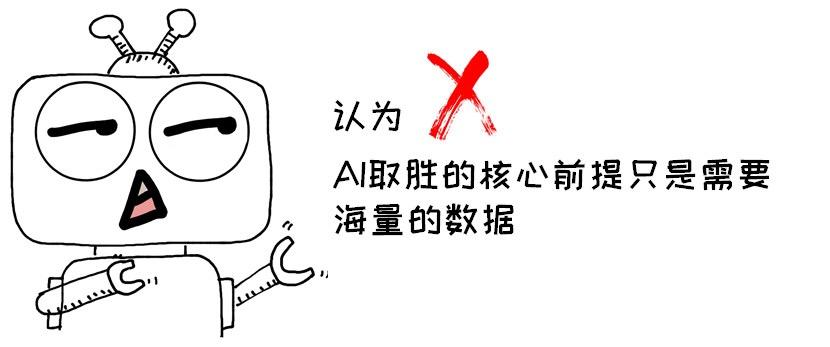
  
- 对于实际问题，我们需要来自问题领域的样本。首先尝试查找公共数据集。关于创建高质量自定义数据集的研究还有所欠缺。如果没有可用的资料，请搜寻你可以抓取数据的位置。该位置通常有很多参考，但数据质量通常较低，还需要投入大量精力进行整理。在抓取样本之前，要专门抽出时间评估所有选项并选择最相关的选项。
    
- 什么叫做高质量的数据集？
    - 类别均衡
    - 数据充足
    - 数据和标记中有高质量信息
    - 数据和标记错误非常小
    - 与你的问题相关度足够高 
    
- 不要一次爬取所有数据。我们经常借助标签和分类来抓取网站样本，从而获取与我们的问题相关的数据。最好的爬取方法是在你的模型中训练、测试少量样本，并根据得到的经验教训改善抓取方法。
    
- 清理你抓取的数据非常重要，否则，即使最好的模型设计也达不到与人类水平相当的表现。数据没有好坏之分，只是有些数据不能满足你的需求。此外，随着样本类别的增加，训练和保持输出质量会变得更加困难，删除不相关的数据可以得到一个更好的模型。
    
- 数据获取领域还有个不可忽视的领域——数据标注：
    - 自行标记
    - 众包服务
    - 借助标注平台
    
</div>

## Step 04. 成功的目标与评估指标

<div class="alert alert-block alert-warning">  
<b>知识回顾📕:</b> 

图像分类问题的评价指标是什么？
    
</div>

**准确率**

In [ ]:
accuracy??

**f1**

In [ ]:
f1_score = FBeta(average='macro', beta=1)

**推理时间**

```python
%timeit
```

In [ ]:
%timeit (1+1)

**模型大小**

<div class="alert alert-block alert-info">
    
<b><目标与指标部分>经验分享👣</b>

  
- 举例
    
</div>

## Step 05. 确定基线快速建模

**重新确认下数据**

In [25]:
path = Path(imgs_dir)

In [26]:
pipeline = DataBlock(
        blocks=(ImageBlock, CategoryBlock), #输入 与 输出
        get_items=get_image_files, # 数据哪里来
        splitter=RandomSplitter(valid_pct=0.2, seed=42), # 如何切分数据集
        get_y=parent_label, # 如何标记数据
        item_tfms=RandomResizedCrop(128, min_scale=0.5),# 如何进行数据预处理
        batch_tfms=aug_transforms()) # 批量图片处理：数据增强方法
data = pipeline.dataloaders(path)

In [27]:
data.vocab

(#3) ['京巴犬','柯基犬','泰迪犬']

In [28]:
data.dataset

(#404) [(PILImage mode=RGB size=1920x1080, TensorCategory(2)),(PILImage mode=RGB size=500x586, TensorCategory(2)),(PILImage mode=RGB size=800x600, TensorCategory(1)),(PILImage mode=RGB size=564x425, TensorCategory(0)),(PILImage mode=RGB size=1086x1633, TensorCategory(2)),(PILImage mode=RGB size=480x640, TensorCategory(2)),(PILImage mode=RGB size=570x380, TensorCategory(0)),(PILImage mode=RGB size=572x732, TensorCategory(2)),(PILImage mode=RGB size=562x750, TensorCategory(0)),(PILImage mode=RGB size=640x602, TensorCategory(2))...]

### 训练基线模型

<div class="alert alert-block alert-warning">  
<b>知识回顾📕:</b> 

还记得**迁移学习**么？ 

——站在巨人肩上的捷径！
</div>

<center>
<img src="imgs/transfer_learning.png" height="200" width="60%">
</center>

In [29]:
learn = cnn_learner(data, resnet18, metrics=[accuracy,FBeta(average='macro', beta=1)])
learn.summary()

Sequential (Input shape: ['64 x 3 x 128 x 128'])
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               64 x 64 x 64 x 64    9,408      False     
________________________________________________________________
BatchNorm2d          64 x 64 x 64 x 64    128        True      
________________________________________________________________
ReLU                 64 x 64 x 64 x 64    0          False     
________________________________________________________________
MaxPool2d            64 x 64 x 32 x 32    0          False     
________________________________________________________________
Conv2d               64 x 64 x 32 x 32    36,864     False     
________________________________________________________________
BatchNorm2d          64 x 64 x 32 x 32    128        True      
________________________________________________________________
ReLU                 64 x 64 x 32 x 32    0          False     
_________________________________________________

In [30]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,fbeta_score,time
0,1.438833,0.476858,0.880000,0.872834,00:04


epoch,train_loss,valid_loss,accuracy,fbeta_score,time
0,0.320540,0.117360,0.960000,0.956809,00:03
1,0.255633,0.041804,0.980000,0.979454,00:03
2,0.210238,0.030163,0.990000,0.990207,00:03
3,0.163542,0.032205,0.990000,0.990207,00:03


<div class="alert alert-block alert-info">
<b>提示💡:</b> 

    
尝试训练更多的轮数，看是否取得更好的结果？
    
</div>

<div class="alert alert-block alert-warning">  
<b>知识回顾📕:</b> 

神经网络是如何学习的？
</div>

<center>
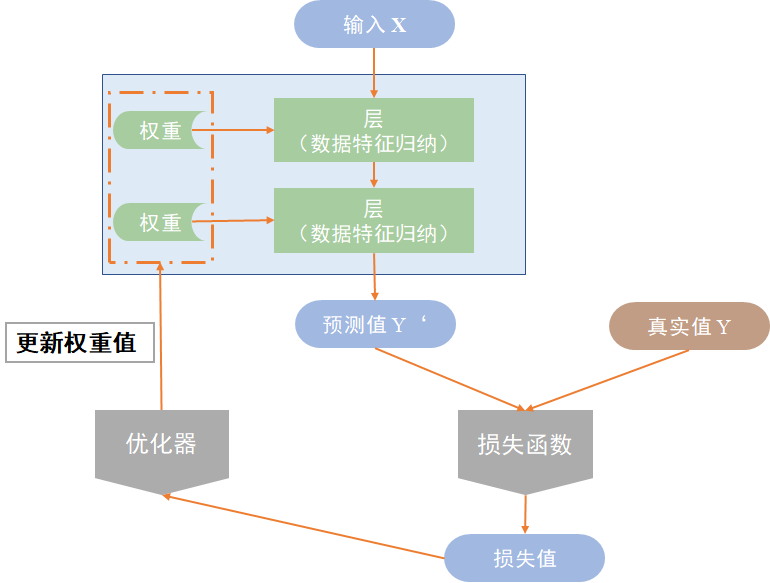
</center>

<div class="alert alert-block alert-info">
<b>网络是如何学习？💡:</b>   

<center>
<img src="imgs/3d-gradient-descent.gif" height="200" width="60%">
</center>   
    
</div>

### 训练结果分析

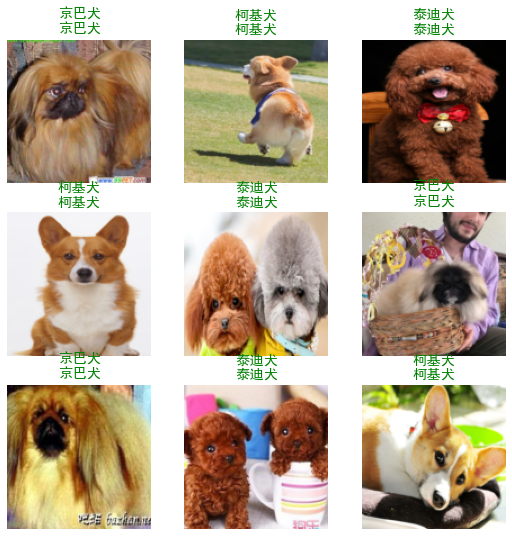

In [31]:
learn.show_results()

In [32]:
interp = ClassificationInterpretation.from_learner(learn)

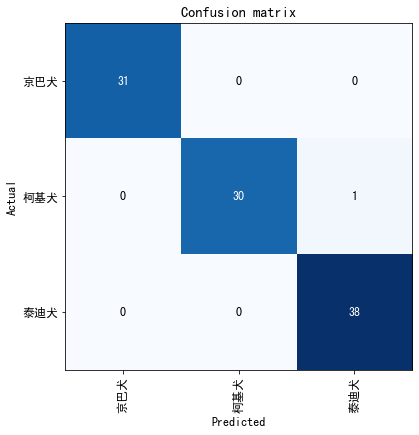

In [33]:
interp.plot_confusion_matrix(figsize=(6,6))

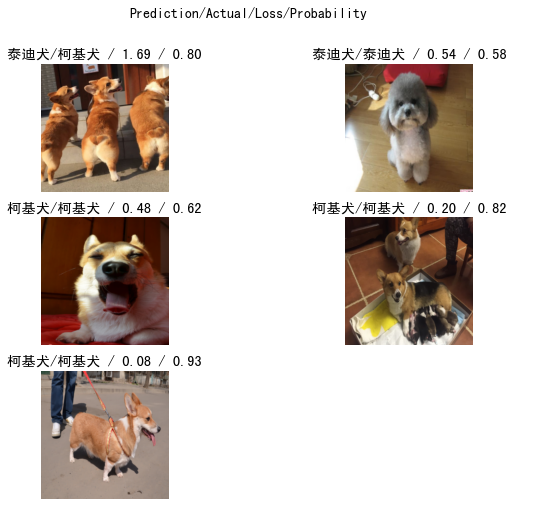

In [34]:
interp.plot_top_losses(5, nrows=3,figsize=(10,8))

In [35]:
interp.print_classification_report()

              precision    recall  f1-score   support

         京巴犬       1.00      1.00      1.00        31
         柯基犬       1.00      0.97      0.98        31
         泰迪犬       0.97      1.00      0.99        38

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [36]:
interp.most_confused()

[('柯基犬', '泰迪犬', 1)]

#### 逐图片分析

In [ ]:
show_all_test_imgs(learn,interp)

### 可视化分析

<div class="alert alert-block alert-success">  
✅：

如何透过黑盒子，来了解人工智能模型真正学到了什么？  
</div>

In [42]:
btn_upload = widgets.FileUpload(description='上传')
btn_upload

FileUpload(value={}, description='上传')

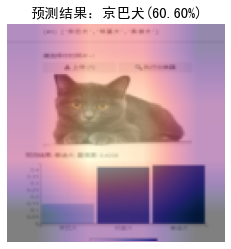

In [43]:
im = PILImage.create(btn_upload.data[-1])
show_heatmap(im,learn)

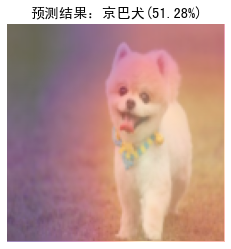

In [38]:
show_heatmap(PILImage.create('imgs/dog.jpg'),learn)

In [39]:
huskies_and_cat = PILImage.create('imgs/huskies_and_cat.png')

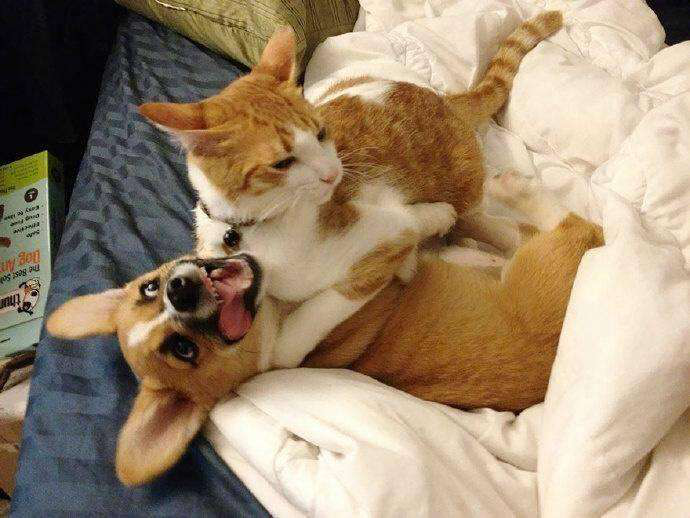

In [40]:
huskies_and_cat

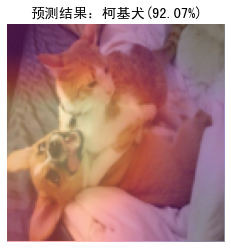

In [41]:
show_heatmap(huskies_and_cat,learn)

<div class="alert alert-block alert-info">
    
<b>经验分享👣</b>

</div>

### *Next

<div class="alert alert-block alert-success">  
✅：我有一个Baseline模型了，下一步该做点什么？
<br>

1. 清理下数据，看看数据是否足够全面？

2. 分析下数据集数量是否足够，能否快速获取新的数据集？
    
3. 刚下载失败的数据集可以手动下载，然后上传到文件夹
    
4. 调整`epoch`值，训练更多的轮数？
    
5. 选择更高级的网络结构？
</div>

In [44]:
cleaner = ImageClassifierCleaner(learn)
cleaner

<div class="alert alert-block alert-info">
<b>提示💡:</b> 

    
#如果进行清理操作，将下面代码的注释取消并执行
    
</div>

In [ ]:
# 被注释掉的代码
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

<div class="alert alert-block alert-danger">  
<b>重要📌</b>  
    
**可能有些问题你不需要海量的数据：**
使用这些步骤清理数据集后，我们通常会看到此任务的准确性接近100％。而达到这样的结果，每个类别只有不足150张的图像。如您所见，常见的抱怨是您需要大量数据才能进行深度学习，这可能与事实相去甚远！
</div>

## Step 06. 模型部署与上线

<div class="alert alert-block alert-success">  
概要✅：

第六步中，我们一起尝试将训练好的模型转变成一个在线的web服务，并发布为在线服务;
    
模型部署阶段考虑的主要问题是：“该如何以自动化，可复制和可审核的方式部署机器学习模型？”
  
</div>

In [45]:
learn.export()

In [ ]:
!ls -l --b=m *.pkl

In [ ]:
learn_inf = load_learner('export.pkl')

In [ ]:
%timeit learn_inf.predict('imgs/dog.jpg')

<div class="alert alert-block alert-info">
<b>提示💡:</b> 

使用 `%timeit`测试一下一次预测的执行时间，看看是否满足预期？
</div>

<div class="alert alert-block alert-danger">  
<b>重要📌</b>
    
当我们千辛万苦完成了前面的数据获取、数据清洗、模型训练、模型评估等等步骤之后，终于等到老大说“上线”啦。想到辛苦训练出来的模型要被调用还有点小激动呢，可是真当下手的时候就有点懵了：模型要怎么部署？部署在哪里？有什么限制或要求？ 
    
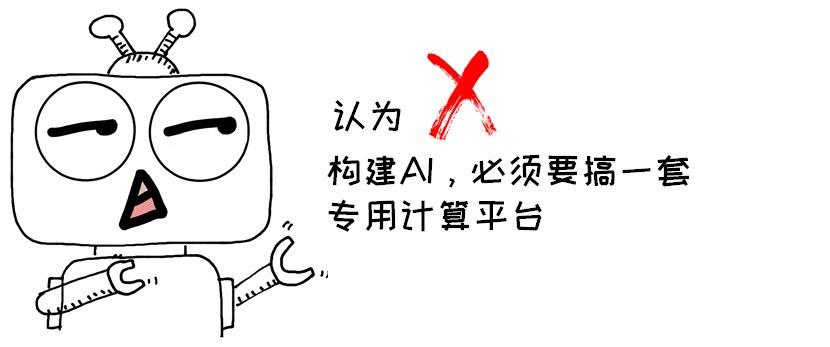
    
- 部署环境的要求：云侧还是端侧？
- 一定要使用GPU么？
- 安全性
- 传输时延
- 高可用性
- 负载均衡
</div>

![](imgs/model_serving.png)

### 编写一个简单的GUI

<div class="alert alert-block alert-success">  
概要✅：

使用`ipywidgets`编写一个简单的GUI
</div>

<center>
<img src="imgs/UI.png" height="200" width="35%">
</center>

In [ ]:
#上传图像按钮
btn_upload = widgets.FileUpload(description='上传')
btn_upload

In [ ]:
#模型预测结果显示模块
out_pl = widgets.Output()
out_pl.clear_output()
lbl_pred = widgets.Label()

In [ ]:
#制作一个执行分类动作的按钮
btn_run = widgets.Button(description='分类')
btn_run

In [ ]:
#执行任务的处理逻辑
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'结果: {pred}; 概率: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

我们将上述内容整合进一个VBox中，完成GUI部分的内容设计

In [ ]:
btn_upload = widgets.FileUpload(description='上传')

In [ ]:
#hide_output
VBox([widgets.Label('上传一张图片!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

### 部署你的应用(原型)

<div class="alert alert-block alert-success">  
概要✅：

此部分我们将通过最少的代码改动，将我们前面训练完成的模型部署为一个Web应用，并可以依托免费的服务承载你的人工智能应用，这样就可以分享给大家来使用了。
</div>

#### Voila

<div class="alert alert-block alert-success">  
概要✅：

voila是一个可以将Jupyter Notebook快速转变成web app的工具，更多内容参见[Github](https://github.com/voila-dashboards/voila)
</div>

![](https://tva1.sinaimg.cn/large/006tNbRwly1gaxioeh72ej30kb0g2wfc.jpg?imageView2/2/w/1120/q/90/interlace/1/ignore-error/1)

💪->新建一个Notebook，完成web应用的开发~

### 发布你的应用 

<div class="alert alert-block alert-success">  
概要✅：

此部分我们将演示如何发布自己的人工智能应用，此处我们使用[SeeMe.ai](https://seeme.ai), 一家创业公司提供的模型市场服务。
为了支持相关服务，请安装配置相关依赖库：
    
```python
!pip install --upgrade --no-cache-dir seeme
```
</div>

#### 配置SeeMe SDK

In [ ]:
# Import the SeeMe client
from seeme import Client
# Create a SeeMe client
client = Client()

<div class="alert alert-block alert-info">
<b>💡:</b> 
- 将下面内容替换为你自己的信息~
</div>

In [ ]:
# If you haven't already registered, follow these steps:
my_password =  # example: "supersecurepasswordfromonepassword"
my_username =  # example: "janvdp"
my_email =  # example: "jan@seeme.ai"
my_firstname =  # example: "Jan"
my_name =  # example: "Van de Poel"

In [ ]:
client.register(username=my_username, email=my_email, password=my_password, firstname=my_firstname, name=my_name)
# Once you have registered, you can log in:
client.login(my_username, my_password);

#### 准备发布应用

In [ ]:
# Get the application_id for your framework (version).
application_id = client.get_application_id(
    base_framework="pytorch",
    framework="fastai",
    base_framework_version="1.6.0",
    framework_version="2.0.9",
    application="image_classification"
)

In [ ]:
# Create model with name and description

model_name = "我的第一个人工智能项目"
description = "🐕🐕分类器"
classes = "Cats and dogs"

my_model = client.create_model({
    "name": model_name,
    "description": description,
    "classes": classes,
    "application_id": application_id
})

#### 上传模型

In [ ]:
# Deploy your exported model.
client.upload_model(my_model["id"], "./")

> 模型上传之后，会自动被转化为`ONNX` 和 `CoreML`格式，用于移动端推理。

![](imgs/onnx.png)

#### 使用模型

模型部署成功之后可以通过多种客户端或脚本来使用模型的服务:

- [Python SDK](https://pypi.org/project/seeme/)
- [Web app](https://app.seeme.ai)
- [iOS - App Store](https://apps.apple.com/us/app/id1443724639)
- [Android - Play Store](https://play.google.com/store/apps/details?id=ai.seeme)

**(1) Python SDK**

使用[Python SDK](https://pypi.org/project/seeme/) 可以在任何环境中与服务端进行通信并进行模型的预测，当然需要满足如下依赖：

- 安装了SeeMe SDK；
- 完成了登录授权验证；
- 拥有部署的应用 id

<div class="alert alert-block alert-info">
<b>💡:</b> 
- 修改下面的`"imgs/dog.jpg"` 为你的测试图像在磁盘中的位置
</div>

In [ ]:
# make sure you are logged in.
img = "imgs/dog.jpg"

In [ ]:
# Here, we will use the Python SDK to classify our test image
result = client.inference(my_model["id"], img)
print(result["prediction"]);print(result["confidence"])

**(2) Web App**

 打开网站[app.seeme.ai](https://app.seeme.ai)， 使用你刚刚注册的`my_username, my_password)`信息登录
 
 ![](imgs/seemai_web.png)

**(3) 移动端(iOS/Android)**

IOS AppStore 搜索 `SeeMe.ai`获得应用， Android通过Android Play Store搜索 `Seeme.ai`.

<img src="imgs/seeme-ai-mobile-model-detail.jpg" height="200" width="20%">

<div class="alert alert-block alert-info">
    
<b>经验分享👣</b>

还有一款常用的工具叫做`streamlit`，同样可以快速开发原型，参见官网：https://www.streamlit.io/

- 我用三分钟搭建的demo,详戳[链接🔗](http://lab.a-stack.com:8502/)    
</div>

<details> <summary>代码详情</summary>

```python
from utils import *
import streamlit as st

IMAGE_TYPES = ["bmp", "jpg","png"]

inf_learner = load_learner('export.pkl')
class_map = inf_learner.dls.vocab 


def main():
    """Run to execute main application"""
    st.title("🐕狗狗分类模型🐕")
    st.write("> 这个人工智能模型能够分辨: 【" + ', '.join(list(class_map))+'】')
    image = st.file_uploader("🔎请上传一张用于检测的图像:", IMAGE_TYPES)

    if image:
        st.image(image, use_column_width=True,width=450)
        img = PILImage.create(image)

        pred, _, prod = inf_learner.predict(img)
        prediction_string = f"**预测结果为**： {pred}， **置信度**： {prod.max()*100:.04f}%."

        st.markdown(prediction_string)
        st.balloons()

main()  
```
    
</details>

## Step 07. 其它要考虑的问题

<div class="alert alert-block alert-info">
<b>值得思考的内容💡:</b> 

> 很多值未能详细探讨的内容，在此罗列

1. 持续迭代，持续收集数据；
2. 环境因素的考量；
3. 是否需要多个模型？
4. 部署位置
5. 模型调试的炼金术
</div>

### 👍挑战一下自己👍

<div class="alert alert-block alert-success">  
👍挑战一下自己👍：

1. 大胆Share你的模型
2. 通过对数据进行优化及预处理，迭代模型，能够提升模型的检测结果？
    
    <details><summary>🤔--Tips👇</summary>
    
    - 比如训练更多的epochs？
        
    - 更换网络：resnet50,xresnet34,xresnet50
        
    - 收集更多的数据？
        
    - 优化现在的数据？
    </details>
3. 再选一种或两种狗的类别，增加到数据集中，看是否可以获得理想中的结果？ 
4. 能够使用同一套pipeline构建点不一样的东西？ 比如分类正常样品/异常样品，分类手写数字/字母，分类男人/女人，分类美国人/澳大利亚人，分类...
</div>

### *关于模型优化的进阶(可选)

#### 核心超参数

本部分研究了用于训练图像分类的深度学习模型的一些关键参数。下表显示了默认参数：

| 参数 |  默认值 |
| --- | --- |
| 学习率 | 2e-3 |
| 训练轮数 | 5 |
| 批大小 | 64 |
| 图像大小 | 128 X 128 |
| 模型架构 | resnet18 |


#### 不同模型架构的影响

<center>
<img src="imgs/07_1.png" width="500"/>
</center>

#### 学习率

学习率是所有超参数中最重要的一个，学习率选择的好坏影响模型的训练时间、最终模型的准确率等。下图为微软团队在6个不同的数据集上测试了各种学习率，对整个网络进行了3或15轮的训练。

<center>
<img src="imgs/7_2.png" width="1000"/>
</center>

<details><summary><em>理解上述图标</em></summary>
<p>
    
>   左图显示了训练15轮对不同数据集的不同学习率的结果。我们看到学习率为1e-4的结果是我们测试的数据集的最佳整体准确性。请注意，数据集之间存在相当大的差异，对于某些数据集，学习率1-e3可能会更好。 在右边的图中，在15轮，1e-4的结果仅比1e-3的结果略好。但是，仅训练3轮，1e-3的学习率执行较小的学习率。这是有道理的，因为我们将训练仅限于3轮的情况下，更快更新权重的模型应该会表现更好。有效地，较高的学习率将更接近模型收敛。此结果表明，较高的学习率（例如1e-3）可能有助于最小化训练时间，而如果不限制训练时间，则较低的学习率（例如1e-5）可能会更好。

</p>
</details>

在这两个图中，我们可以看到1e-3和1e-4的学习率通常会起作用。我们观察到，与训练15轮相比，训练3轮会降低准确性。在某些情况下，较小的学习率可能会阻止DNN收敛。

#### 图像分辨率

模型的输入图像分辨率也会影响模型的准确性。通常，卷积神经网络能够利用更高分辨率的图像，特别是如果感兴趣的对象在整个图像中很小的情况下。但是图像尺寸如何影响其他模型方面？

我们发现，在相同的网络体系结构下，图像大小不会显著影响模型的内存占用，但会对GPU内存产生巨大影响。图像大小也会影响训练和推理速度。

从以下结果中我们可以看到，将图像分辨率从__300 X 300__增加到__500 X 500__会以稍长的训练时间和较慢的推理速度为代价提高性能。

<center>
<img src="imgs/7_3.png" width="600"/>
</center>

### *优化进阶： 使用贝叶斯优化算法进行参数搜索(可选)

![](https://github.com/fmfn/BayesianOptimization/raw/master/examples/bayesian_optimization.gif)

#### 配置优化算法与搜索策略

`!pip install bayesian-optimization -q`

In [ ]:
from bayes_opt import BayesianOptimization

In [ ]:
def fit_with(lr:float, wd:float, epochs:float):
  # create a Learner
  config = cnn_config(ps=wd)
  learn = cnn_learner(data, resnet18, metrics=accuracy, config=config)
    
  # Train for x epochs
  with learn.no_bar():
    learn.fine_tune(int(epochs),base_lr=lr)
    
  # Save, print, and return the overall accuracy
  acc = float(learn.validate()[1])
  
  return acc

#### 配置超参数

In [ ]:
hps = {'lr': (1e-05, 1e-01),
      'wd': (4e-4, 0.5),
      'epochs':(3,6)
      }

构建超参数优化算法

In [ ]:
optim = BayesianOptimization(
    f = fit_with, # our fit function
    pbounds = hps, # our hyper parameters to tune
    verbose = 2, # 1 prints out when a maximum is observed, 0 for silent
    random_state=1
)

In [ ]:
%time optim.maximize(n_iter=10)

获得最佳搜索参数结果：

In [ ]:
print(optim.max)

### 关于添加背景类

### 💪

<div class="alert alert-block alert-info">
<b>Team Work💡:</b> 

> ShowTime

</div>

# TO-DOs

-[ ] 增加如何处理背景类的演示代码，并进行测试；
- 对时间进行进一步评估，4-5小时？